In [1]:
import dask.dataframe as dd
import matplotlib.pyplot as plt
%pylab inline

In [41]:
df = dd.read_csv('dns.txt', names=['time', 'src', 'dest'])
print(df.describe().compute())
df = df.dropna()
print(df.src.count().compute())

/home/marik0/anaconda/envs/py3/lib/python3.5/site-packages/dask/compatibility.py:28: RuntimeWarning: invalid value encountered in sqrt
  return func(*args)


               time
count  4.082159e+07
mean   3.578668e+06
std             NaN
min    2.000000e+00
25%    3.114498e+06
50%    4.079431e+06
75%    5.004353e+06
max    5.011199e+06
40821591


In [9]:
print(len(df.src.drop_duplicates()))

15013


In [10]:
print(len(df.dest.drop_duplicates()))

13776


In [11]:
reader = dd.read_csv('flows.txt', names=['time', 'duration','src', 'src_port', 'dest', 
                                         'dest_port', 'protocol', 'packet_count', 'byte_count'])

In [12]:
print(len(reader.src.drop_duplicates()))
print(len(reader.dest.drop_duplicates()))
print(len(reader.dest_port.drop_duplicates()))

11154
8711
75147


In [18]:
print(reader.protocol.drop_duplicates().count().compute())

4


In [20]:
auth = dd.read_csv('auth.txt', names=['time', 'src_user', 'dest_user', 'src_computer', 'dest_computer',
                                      'auth_type', 'logon_type', 'orientation' , 'result'])

In [21]:
print(len(auth.src_user.drop_duplicates()))
print(len(auth.src_computer.drop_duplicates()))

80553


KeyboardInterrupt: 

In [26]:
print(auth[auth.time < 3600*24*1].count().compute())

KeyboardInterrupt: 

In [47]:
print(df.time[(df.time < 3600*24*3) & (df.time >= 3600*24*2)].count().compute())

62767


In [50]:
queries_per_day = []
for i in range(58):
    queries_per_day.append(df.time[(df.time < 3600*24*(i+1)) & (df.time >= 3600*24*i)].count().compute())
    print("computed", i)
print(queries_per_day)

computed 0
computed 1
computed 2
computed 3
computed 4
computed 5
computed 6
computed 7
computed 8
computed 9
computed 10
computed 11
computed 12
computed 13
computed 14
computed 15
computed 16
computed 17
computed 18
computed 19
computed 20
computed 21
computed 22
computed 23
computed 24
computed 25
computed 26
computed 27
computed 28
computed 29
computed 30
computed 31
computed 32
computed 33
computed 34
computed 35
computed 36
computed 37
computed 38
computed 39
computed 40
computed 41
computed 42
computed 43
computed 44
computed 45
computed 46
computed 47
computed 48
computed 49
computed 50
computed 51
computed 52
computed 53
computed 54
computed 55
computed 56
computed 57
[56652, 57087, 62767, 53796, 44244, 67661, 62056, 71554, 64988, 72895, 61250, 57647, 79224, 76155, 92155, 75771, 71933, 56668, 58203, 77476, 75858, 94845, 83037, 9611, 0, 0, 712380, 1343937, 1641306, 723096, 574130, 1062209, 1063320, 1415037, 1461047, 1485701, 1464263, 1187854, 1036206, 986094, 1290565, 1357349, 

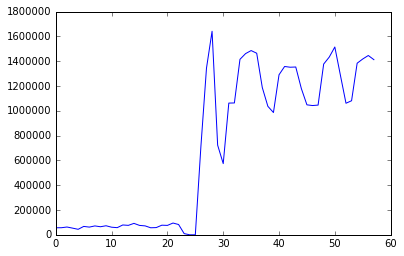

In [66]:
plt.plot(queries_per_day)

In [51]:
sum(queries_per_day)

40821591

In [69]:
flows_per_day = []
pkt_per_day = []
for i in range(58):
    flow = reader[(reader.time < 3600*24*(i+1)) & (reader.time >= 3600*24*i)]
    temp1 = flow.time.count().compute()
    temp2 = flow.packet_count.sum().compute()
    flows_per_day.append(temp1)
    pkt_per_day.append(temp2)
    
    print("computed", i, temp1, temp2)
    
print(flows_per_day, pkt_per_day)

computed 0 8366186 1785455611
computed 1 10189306 2018097441
computed 2 8418328 1839076485
computed 3 6471309 1181257070
computed 4 7198198 1099346827
computed 5 11143780 2167493970
computed 6 11160203 2506466779
computed 7 7714775 2420488639
computed 8 7854993 2214842101
computed 9 7727302 2021024573
computed 10 5392157 865902847
computed 11 5954083 803184639
computed 12 9265182 1852344457
computed 13 7705106 2825159183
computed 14 5399664 2260058672
computed 15 1324104 777191331
computed 16 1226247 778433414
computed 17 980936 444122392
computed 18 1028706 411559548
computed 19 1101056 422409237
computed 20 1300433 902712095
computed 21 1362912 1051918817
computed 22 1359519 994851464
computed 23 188881 81841809
computed 24 0 0
computed 25 0 0
computed 26 34917 2323611
computed 27 55875 2813266
computed 28 44102 2080222
computed 29 9150 67703
computed 30 0 0
computed 31 0 0
computed 32 0 0
computed 33 0 0
computed 34 0 0
computed 35 0 0
computed 36 2 126
computed 37 0 0
computed 38 0

In [70]:
print(sum(flows_per_day))

129977412


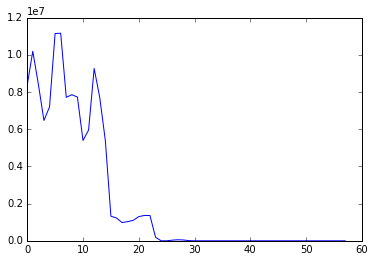

In [77]:
plt.plot(flows_per_day)

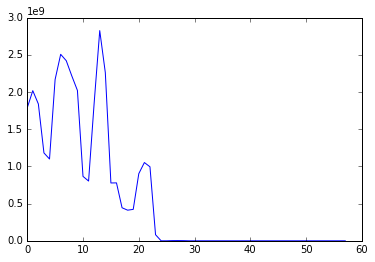

In [78]:
plt.plot(pkt_per_day)

In [80]:
reader.time[reader.time == 24*3600*50].compute()

Series([], Name: time, dtype: int64)